In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
summary_stats = df_market_data.describe()
print(summary_stats)

       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

In [4]:
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_market_data)

df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

print(df_scaled.head())

print(df_scaled.describe())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [6]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Print the first 5 rows
print(df_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

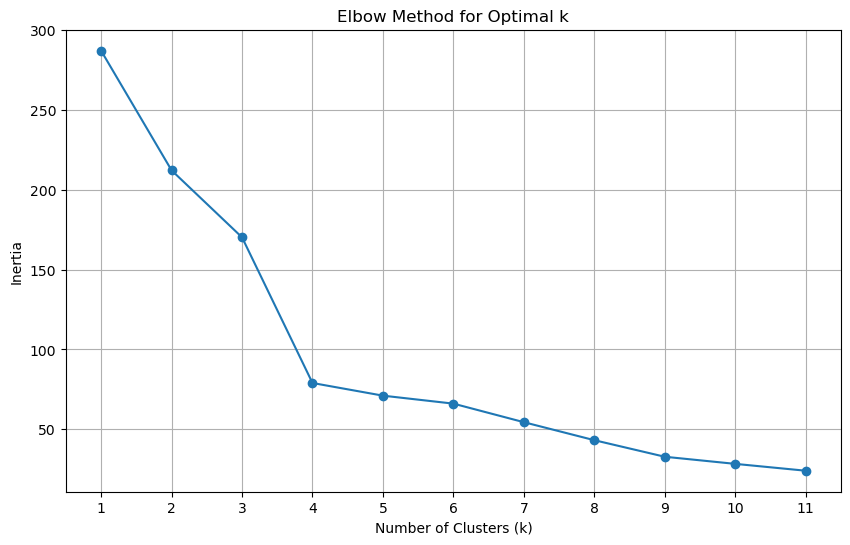

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k values from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {'Number of Clusters (k)': k_values, 'Inertia': inertia_values}

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['Number of Clusters (k)'], elbow_data['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [10]:
#What is the best value for k? 4

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [18]:
# Check the data types of 'PC1' and 'PC2'
print(df_clustered[['PC1', 'PC2']].dtypes)


PC1    float64
PC2    float64
dtype: object


In [19]:
from sklearn.cluster import KMeans

# Best value of k obtained from the elbow method or other techniques
best_k = 4  # Replace this with the actual best value of k

# Initialize KMeans with the best value of k
kmeans = KMeans(n_clusters=best_k, random_state=42)




In [20]:
# Fit the K-means model using the original scaled DataFrame
kmeans.fit(df_scaled)


KMeans(n_clusters=4, random_state=42)

In [21]:
# Predict the clusters for the original scaled DataFrame
clusters = kmeans.predict(df_scaled)


In [22]:
# Create a copy of the original data
df_with_clusters = df_market_data.copy()

# Add a new column with the predicted clusters
df_with_clusters['Cluster'] = clusters


In [23]:
# Import necessary libraries
import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = df_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    cmap='Category10',  # You can choose a different colormap if desired
    legend='bottom_right'
)

# Display the scatter plot
scatter_plot


DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['PC1', 'PC2']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [24]:
from sklearn.decomposition import PCA

# Perform PCA with three components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca_3 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)


In [25]:
# Fit PCA to the scaled data
pca.fit(df_scaled)

# Retrieve the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i + 1}: {ratio:.2f}")


Explained Variance Ratio:
PC1: 0.37
PC2: 0.35
PC3: 0.18


In [26]:
# Create a new DataFrame with the PCA data and set the index
df_pca_with_index = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Print the first 5 rows
print(df_pca_with_index.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [27]:
# Create a list with the number of k values from 1 to 11
k_values = range(1, 12)


In [28]:
# Create an empty list to store the inertia values
inertia_values = []


In [29]:
from sklearn.cluster import KMeans

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the PCA data
    kmeans.fit(df_pca_with_index)
    
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)


In [30]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {'Number of Clusters (k)': list(k_values), 'Inertia': inertia_values}


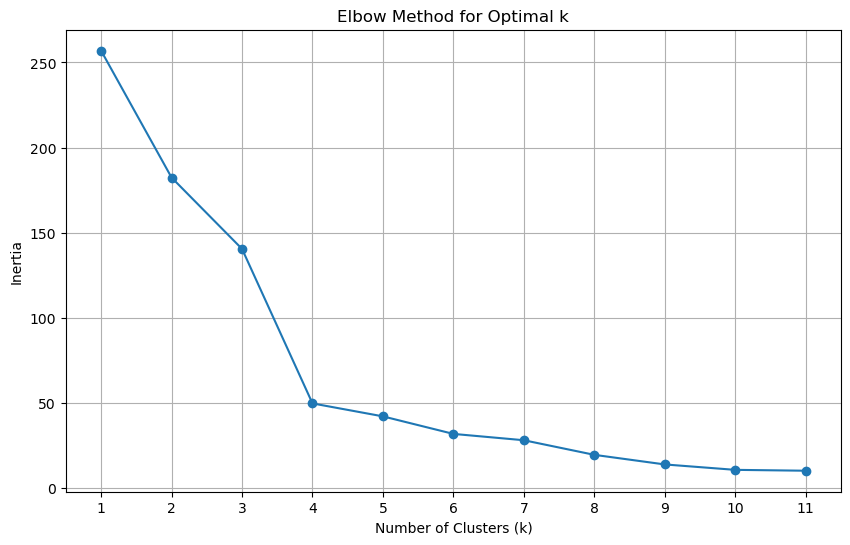

In [31]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['Number of Clusters (k)'], elbow_data['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
#Answer the following question in your notebook:
#What is the best value for k when using the PCA data? 4
#Does it differ from the best k value found using the original data? no both 4 but the graph did shift down 

In [32]:
from sklearn.cluster import KMeans

# Best value of k obtained from the elbow method or other techniques
best_k = 3  # Replace this with the actual best value of k

# Initialize KMeans with the best value of k
kmeans = KMeans(n_clusters=best_k, random_state=42)


In [34]:
# Fit the K-means model using the PCA data
kmeans.fit(df_pca_with_index)


KMeans(n_clusters=3, random_state=42)

In [35]:
# Predict the clusters for the PCA data
pca_clusters = kmeans.predict(df_pca_with_index)


In [36]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_pca_with_index.copy()

# Add a new column to store the predicted clusters
df_pca_with_clusters['Cluster'] = pca_clusters


In [37]:
import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    cmap='Category10',  # You can choose a different colormap if desired
    legend='bottom_right'
)

# Display the scatter plot
scatter_plot


DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['price_change_percentage_24h', 'price_change_percentage_7d']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [38]:
#Answer the following question:
#What is the impact of using fewer features to cluster the data using K-Means?It changes the points 
#but not the k means.Shifts the graph down 

SyntaxError: invalid syntax (1757124227.py, line 1)